# Pymaceuticals Inc.
---

### Analysis

## Data Wrangling/Initialization

In [59]:
#Imports
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [60]:
# Study data files
mouseDataPath = "data/Mouse_metadata.csv"
studyResultsPath = "data/Study_results.csv"

# Read the mouse data and the study results
mouseData = pd.read_csv(mouseDataPath)
studyResults = pd.read_csv(studyResultsPath)

# Combine the data into a single DataFrame
combinedData = pd.merge(studyResults, mouseData, on='Mouse ID', how='outer')

# Display the data table for preview
combinedData.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [61]:
# Checking the number of mice.
len(combinedData['Mouse ID'].unique())

249

In [62]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupes = combinedData[combinedData.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
dupes

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [63]:
# Optional: Get all the data for the duplicate mouse ID.
combinedData.loc[combinedData['Mouse ID'] == 'g989']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [64]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanData = combinedData.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')
cleanData.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [96]:
# Checking the number of mice in the clean DataFrame.
len(cleanData['Mouse ID'].unique())
print(cleanData.shape[0])

1888


## Summary Statistics

In [70]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

#statSumDF = cleanData[['Drug Regimen', 'Tumor Volume (mm3)']].groupby('Drug Regimen').describe()
groupedByRegimen = cleanData[['Drug Regimen', 'Tumor Volume (mm3)']].groupby('Drug Regimen')
sumValList = []

gbrMean = groupedByRegimen['Tumor Volume (mm3)'].mean()
gbrMean.name = 'Mean of Tumor Volume'
gbrMedian = groupedByRegimen['Tumor Volume (mm3)'].median()
gbrMedian.name = 'Median of Tumor Volume'
gbrVar = groupedByRegimen['Tumor Volume (mm3)'].var()
gbrVar.name = 'Variance of Tumor Volume'
gbrStdev = groupedByRegimen['Tumor Volume (mm3)'].std()
gbrStdev.name = 'Standard Dev of Tumor Volume'
gbrSem = groupedByRegimen['Tumor Volume (mm3)'].sem()
gbrSem.name = 'SEM of Tumor Volume'

statSumDF = pd.concat([gbrMean, gbrMedian, gbrVar, gbrStdev, gbrSem], axis = 1)
statSumDF

,Mean of Tumor Volume,Median of Tumor Volume,Variance of Tumor Volume,Standard Dev of Tumor Volume,SEM of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [83]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)







#NEEDS WORK STILL








# Using the aggregation method, produce the same summary statistics in a single line
cleanData[['Drug Regimen','Tumor Volume (mm3)']].agg({'Tumor Volume (mm3)': ['mean', 'median','var', 'std', 'sem']})

,Tumor Volume (mm3)
mean,50.449276
median,48.951421
var,79.291277
std,8.904565
sem,0.204933


## Bar and Pie Charts

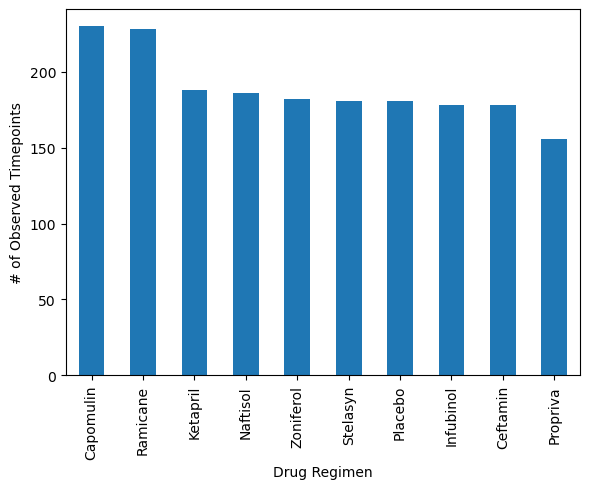

In [91]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drugCount = cleanData['Drug Regimen'].value_counts()
figAsize = (6,5)
figA = drugCount.plot(kind='bar', xlabel='Drug Regimen', ylabel='# of Observed Timepoints', figsize=figAsize)

figAxTic = drugCount.index
figA.set_xticklabels(figAxTic)

plt.tight_layout()

<function matplotlib.pyplot.show(close=None, block=None)>

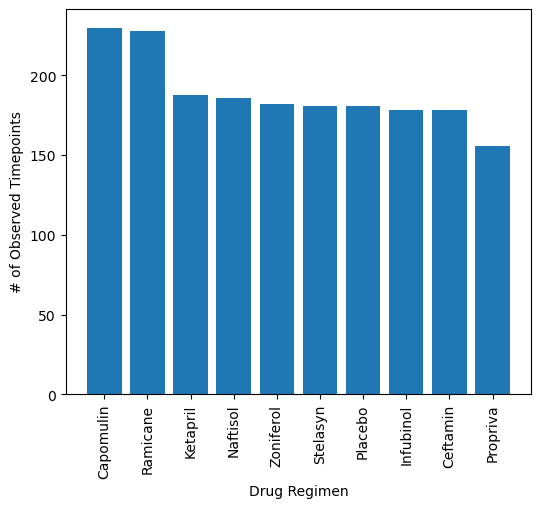

In [94]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drugCount = cleanData['Drug Regimen'].value_counts()
plt.figure(figsize=(6,5))

xAxis = drugCount.index
plt.bar(xAxis, drugCount.values)
figBticloc = [value for value in xAxis]
plt.xticks(figBticloc, xAxis, rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Timepoints")
plt.show

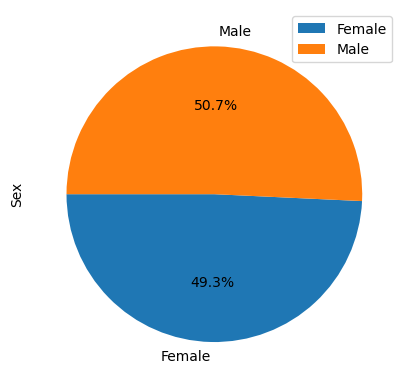

In [118]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
figC = cleanData.groupby(['Sex']).count().plot(kind='pie', y='Mouse ID', ylabel='Sex', autopct='%1.1f%%', startangle=180)
plt.show()

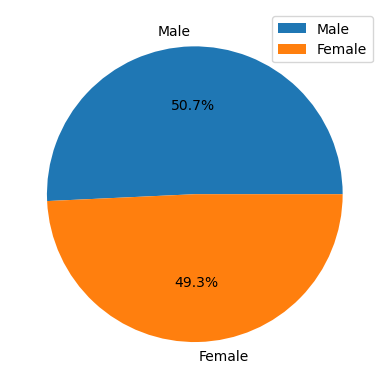

In [125]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = cleanData['Sex'].value_counts().index
sizes = cleanData['Sex'].value_counts().values

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.legend()
plt.show()

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds

In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen